In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\Telecom_customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [80]:
data.describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.516967,0.700412,0.096834,0.481329,0.872923,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.690473,0.407781,1.315633,64.761692,0.734630
std,0.500013,0.499748,0.458110,0.295752,0.499687,0.737796,0.500024,0.496232,0.496355,0.499988,0.489723,0.488977,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [6]:
data=data.drop(['customerID'],axis=1)

In [7]:
data=data.drop(['SeniorCitizen'],axis=1)

In [8]:
data.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data['gender']=data['gender'].replace({'Male':0,'Female':1})

In [11]:
data['Partner']=data['Partner'].replace({'Yes':0,'No':1})

In [12]:
data['Dependents']=data['Dependents'].replace({'Yes':0,'No':1})

In [13]:
data['PhoneService']=data['PhoneService'].replace({'Yes':0,'No':1})

In [14]:
data['MultipleLines']=data['MultipleLines'].replace({'Yes':0,'No':1,'No phone service':0})

In [15]:
data['InternetService']=data['InternetService'].replace({'DSL':0,'Fiber optic':1,'No':2})

In [16]:
data['OnlineSecurity']=data['OnlineSecurity'].replace({'Yes':0,'No':1,'No internet service':0})

In [17]:
data['OnlineBackup']=data['OnlineBackup'].replace({'Yes':0,'No':1,'No internet service':0})

In [18]:
data['DeviceProtection']=data['DeviceProtection'].replace({'Yes':0,'No':1,'No internet service':0})

In [19]:
data['TechSupport']=data['TechSupport'].replace({'Yes':0,'No':1,'No internet service':0})

In [20]:
data['StreamingTV']=data['StreamingTV'].replace({'Yes':0,'No':1,'No internet service':0})

In [21]:
data['StreamingMovies']=data['StreamingMovies'].replace({'Yes':0,'No':1,'No internet service':0})

In [22]:
data['Contract']=data['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})

In [23]:
data['PaperlessBilling']=data['PaperlessBilling'].replace({'Yes':0,'No':1})

In [24]:
data['PaymentMethod']=data['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [25]:
data['Churn']=data['Churn'].replace({'Yes':0,'No':1})

In [26]:
data.TotalCharges.replace({" ": "0"},inplace=True)

In [27]:
data.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,29.85,29.85,1
1,0,1,1,34,0,1,0,0,1,0,1,1,1,1,1,1,56.95,1889.5,1
2,0,1,1,2,0,1,0,0,0,1,1,1,1,0,0,1,53.85,108.15,0
3,0,1,1,45,1,0,0,0,1,0,0,1,1,1,1,2,42.30,1840.75,1
4,1,1,1,2,0,1,1,1,1,1,1,1,1,0,0,0,70.70,151.65,0


In [28]:
data.shape

(7043, 19)

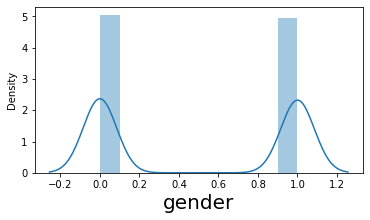

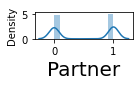

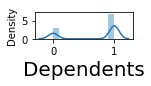

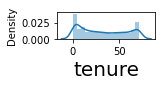

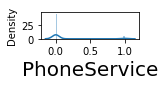

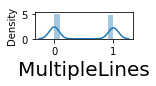

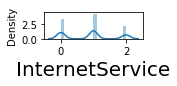

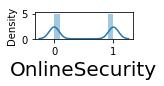

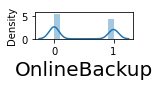

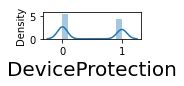

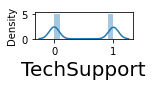

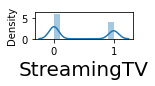

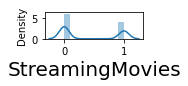

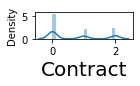

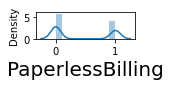

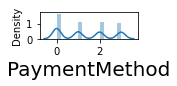

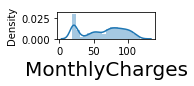

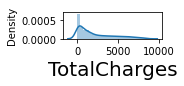

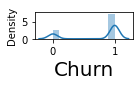

In [29]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in data:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
        
        plt.show()

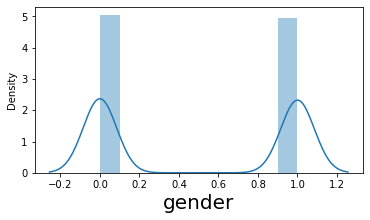

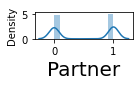

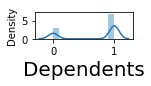

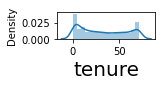

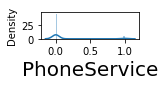

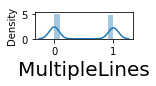

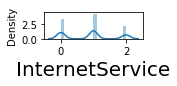

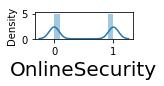

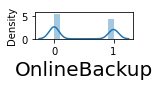

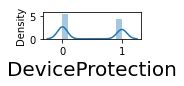

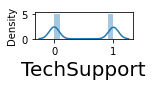

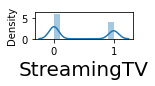

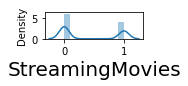

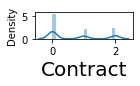

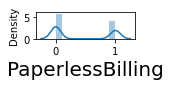

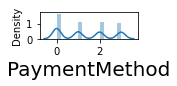

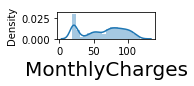

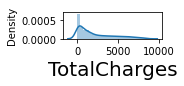

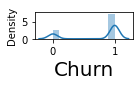

In [30]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in data:
    if plotnumber<=19:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
        
        plt.show()

<AxesSubplot:>

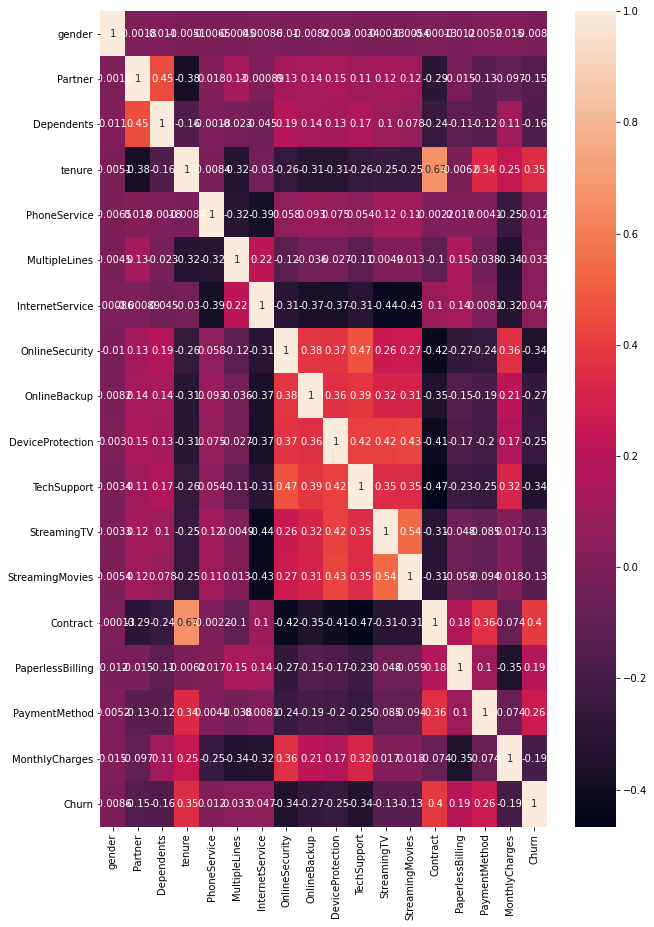

In [31]:
plt.figure(figsize=(10,15))
sns.heatmap(data.corr(), annot=True)

In [32]:
x=data.drop(columns=['Churn'])
y=data.Churn

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
x_scaled.shape[1]

18

In [35]:
vif=pd.DataFrame()

vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

In [36]:
vif

,vif,Features
0,1.001646,gender
1,1.445744,Partner
2,1.334647,Dependents
3,7.191956,tenure
4,1.869118,PhoneService
5,1.531986,MultipleLines
6,2.273138,InternetService
7,1.653487,OnlineSecurity
8,1.489893,OnlineBackup
9,1.606297,DeviceProtection


In [37]:
correlation = data['TotalCharges']
correlation

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [38]:
correlation = data['tenure']
correlation

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [39]:
data=data.drop(columns=['tenure'])

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [41]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [43]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8018171493469619

In [44]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 263,  219],
       [ 130, 1149]], dtype=int64)

In [45]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [46]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8018171493469619

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       482
           1       0.84      0.90      0.87      1279

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [69]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [70]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)

In [71]:
Accuracy

0.8018171493469619

In [72]:
Precison=true_positive/(true_positive+false_positive)
Precison

0.5456431535269709

In [73]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.6692111959287532

In [74]:
F1_score=2*(Recall*Precison)/(Recall+Precison)
F1_score

0.6011428571428571

In [77]:
auc=roc_auc_score(y_test,y_pred)
print(auc)

0.7220006228932745


In [78]:
fpr,tpr, thresholds=roc_curve(y_test,y_pred)

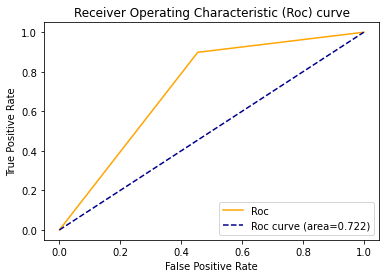

In [79]:
plt.plot(fpr, tpr, color='Orange',label='Roc')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Roc curve (area=%0.3f)'%auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Roc) curve')

plt.legend()

plt.show()

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('E:\datascience\Telecom_customer_churn.csv')

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df.describe()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.516967,0.700412,32.371149,0.096834,0.481329,0.872923,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.690473,0.407781,1.315633,64.761692,0.734630
std,0.500013,0.499748,0.458110,24.559481,0.295752,0.499687,0.737796,0.500024,0.496232,0.496355,0.499988,0.489723,0.488977,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1.000000
75%,1.000000,1.000000,1.000000,55.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [52]:
df.shape

(7043, 21)

In [53]:
df=df.drop(['customerID'],axis=1)

In [54]:
df=df.drop(['SeniorCitizen'],axis=1)

In [55]:
df['gender']=df['gender'].replace({'Male':0,'Female':1})
df['Partner']=df['Partner'].replace({'Yes':0,'No':1})
df['Dependents']=df['Dependents'].replace({'Yes':0,'No':1})
df['PhoneService']=df['PhoneService'].replace({'Yes':0,'No':1})
df['MultipleLines']=df['MultipleLines'].replace({'Yes':0,'No':1,'No phone service':0})
df['InternetService']=df['InternetService'].replace({'DSL':0,'Fiber optic':1,'No':2})
df['OnlineSecurity']=df['OnlineSecurity'].replace({'Yes':0,'No':1,'No internet service':0})
df['OnlineBackup']=df['OnlineBackup'].replace({'Yes':0,'No':1,'No internet service':0})
df['OnlineBackup']=df['OnlineBackup'].replace({'Yes':0,'No':1,'No internet service':0})
df['DeviceProtection']=df['DeviceProtection'].replace({'Yes':0,'No':1,'No internet service':0})
df['TechSupport']=df['TechSupport'].replace({'Yes':0,'No':1,'No internet service':0})
df['StreamingTV']=df['StreamingTV'].replace({'Yes':0,'No':1,'No internet service':0})
df['StreamingMovies']=df['StreamingMovies'].replace({'Yes':0,'No':1,'No internet service':0})
df['Contract']=df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2})
df['PaperlessBilling']=df['PaperlessBilling'].replace({'Yes':0,'No':1})
df['PaymentMethod']=df['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df['Churn']=df['Churn'].replace({'Yes':0,'No':1})
df.TotalCharges.replace({" ": "0"},inplace=True)

In [56]:
df.shape

(7043, 19)

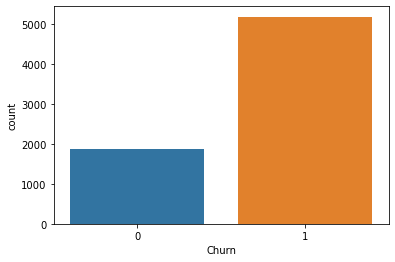

In [57]:
sns.countplot(x='Churn',data=df)
plt.show()

In [58]:
from sklearn.feature_selection import SelectKBest,f_classif

In [59]:
x=df.drop('Churn',axis=1)
y=df.Churn

In [60]:
best_features=SelectKBest(score_func=f_classif,k=15)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(15,'Score'))

        Feature_Name        Score
13          Contract  1315.088872
3             tenure   997.268010
7     OnlineSecurity   936.566070
10       TechSupport   903.785170
8       OnlineBackup   544.868484
15     PaymentMethod   522.432021
9   DeviceProtection   479.401833
17      TotalCharges   288.278961
16    MonthlyCharges   273.463704
14  PaperlessBilling   268.985218
2         Dependents   195.149314
1            Partner   163.060036
12   StreamingMovies   122.644617
11       StreamingTV   118.994122
6    InternetService    15.782320


In [61]:
new_x=df[['Contract','tenure','OnlineSecurity','TechSupport','OnlineBackup','PaymentMethod','DeviceProtection','TotalCharges','MonthlyCharges','PaperlessBilling','Dependents','Partner','StreamingMovies','StreamingTV','InternetService']]

In [62]:
new_x

,Contract,tenure,OnlineSecurity,TechSupport,OnlineBackup,PaymentMethod,DeviceProtection,TotalCharges,MonthlyCharges,PaperlessBilling,Dependents,Partner,StreamingMovies,StreamingTV,InternetService
0,0,1,1,1,0,0,1,29.85,29.85,0,1,0,1,1,0
1,1,34,0,1,1,1,0,1889.5,56.95,1,1,1,1,1,0
2,0,2,0,1,0,1,1,108.15,53.85,0,1,1,1,1,0
3,1,45,0,0,1,2,0,1840.75,42.30,1,1,1,1,1,0
4,0,2,1,1,1,0,1,151.65,70.70,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,0,0,1,1,0,1990.5,84.80,0,0,0,0,0,0
7039,1,72,1,1,0,3,0,7362.9,103.20,0,0,0,0,0,1
7040,0,11,0,1,1,0,1,346.45,29.60,0,0,0,1,1,0
7041,0,4,1,1,1,1,1,306.6,74.40,0,1,0,1,1,1


In [63]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

In [65]:
knn=KNeighborsClassifier()

In [66]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 263,  219],
       [ 130, 1149]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       482
           1       0.84      0.90      0.87      1279

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761

